In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('./train_cleaned.csv')

In [73]:
n_obs = df.shape[0]

np.random.seed(42)
shuffle_list = np.random.choice(range(n_obs), size = n_obs)

train, test = df[0:int(np.floor(len(shuffle_list)*.7))], df[int(np.floor(len(shuffle_list)*.7)):n_obs]

# Temporary handling missing data
train = train.drop(train.loc[train['GarageYrBlt'].isna()].index)
test = test.drop(test.loc[test['GarageYrBlt'].isna()].index)
train = train.drop(train.loc[train['MasVnrArea'].isna()].index)
test = test.drop(test.loc[test['MasVnrArea'].isna()].index)

X_train, Y_train = train.loc[:, train.columns != 'SalePrice'], train['SalePrice']
X_test, Y_test = test.loc[:, test.columns != 'SalePrice'], test['SalePrice']

# Linear regression (out of curiosity)

In [80]:
lin = LinearRegression(normalize=False)

lin.fit(X_train, Y_train)
lin.score(X_test, Y_test)

0.6921588277367534

# Ridge

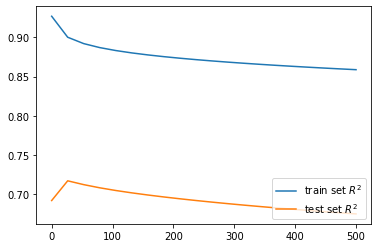

In [89]:
ridge = Ridge()

ridge_train_R2 = []
ridge_test_R2 = []

alpha_range = np.linspace(1e-3,500,20)

for alpha in alpha_range:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, Y_train)
    ridge_train_R2.append(ridge.score(X_train, Y_train))
    ridge_test_R2.append(ridge.score(X_test, Y_test))
    
plt.plot(alpha_range, ridge_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, ridge_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

Clearly overfitting ! Need model simplification

# Lasso

/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80682733224.49594, tolerance: 606258969.5627897
  positive)


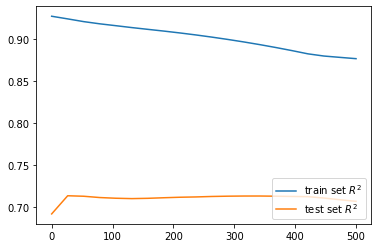

In [95]:
lasso = Lasso(max_iter=10000)

lasso_train_R2 = []
lasso_test_R2 = []

for alpha in alpha_range:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, Y_train)
    lasso_train_R2.append(lasso.score(X_train, Y_train))
    lasso_test_R2.append(lasso.score(X_test, Y_test))
    
plt.plot(alpha_range, lasso_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, lasso_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

# Elastic-net

/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244374206941.33246, tolerance: 606258969.5627897
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583853923429.028, tolerance: 606258969.5627897
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3201048547.1435547, tolerance: 606258969.5627897
  positive)


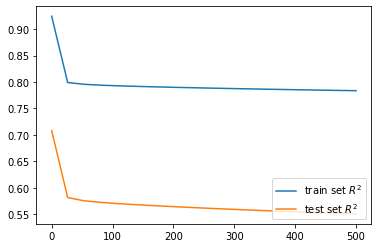

In [98]:
rho = .1

elnet = ElasticNet(l1_ratio=rho, max_iter=10000)

elnet_train_R2 = []
elnet_test_R2 = []

for alpha in alpha_range:
    elnet.set_params(alpha=alpha)
    elnet.fit(X_train, Y_train)
    elnet_train_R2.append(elnet.score(X_train, Y_train))
    elnet_test_R2.append(elnet.score(X_test, Y_test))
    
plt.plot(alpha_range, elnet_train_R2, label=r'train set $R^2$')
plt.plot(alpha_range, elnet_test_R2, label=r'test set $R^2$')
plt.legend(loc=4)